# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load the data
df = pd.read_csv('ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
df.shape

(4612, 15)

- There are 4612 registres and 15 features

In [7]:
# Showing data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
# Show the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [9]:
# Looking for missing values
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

- There are no missing values

In [10]:
# Looking for duplicate values
df.duplicated().sum()

np.int64(0)

- There are no duplicated values

In [11]:
# Describing continious features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [12]:
# Describing categorical features
df.describe(include=[object])

,ID,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
count,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612
unique,4612,3,2,3,3,2,2,2,2,2
top,EXT4612,Professional,Website,High,Email Activity,No,No,No,No,No
freq,1,2616,2542,2264,2278,4115,4379,4085,3907,4519


- ID is an identifier, it can be deleted.

In [13]:
# Dropping ID feature
df = df.drop('ID', axis=1)

In [14]:
# Creating numerical and categorical features
num_features = df.select_dtypes(include='number').columns.tolist()
cat_features = df.select_dtypes(include='object').columns.tolist()

In [15]:
# Checking the numerical features
num_features

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'status']

In [16]:
# Checking the categorical features
cat_features

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

## EDA

- It is a good idea to explore the data once again after manipulating it.


NO VA ACA**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [17]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [18]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Univariate Analisys for numerical features

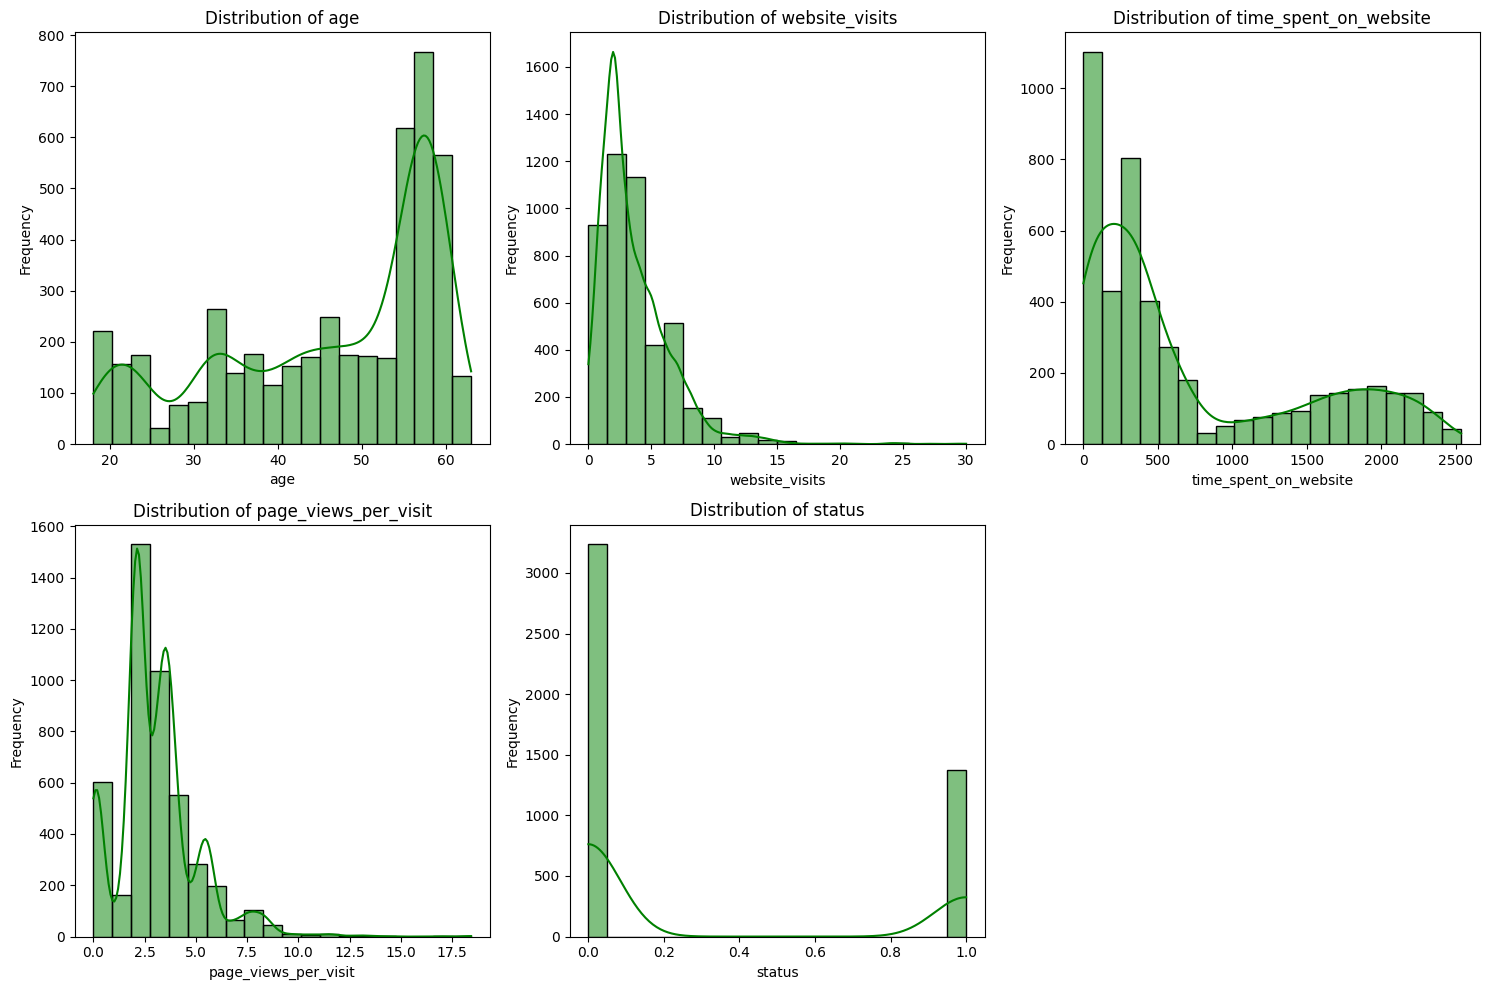

In [19]:
# Histograms of numerical features

# Setting up the grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) 
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20, color="green")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if number of variables < grid cells
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- The age variable is left-skewed, indicating that most customers are older, but there are a few younger ones.

- Website visits are right-skewed, meaning that the majority of customers have a low number of visits, but there are some with a significantly higher number of visits. 

- Page views per visit is right-skewed, showing that most customers view a small number of pages during a visit, but some view significantly more.

- The time spent on the website is highly right-skewed, indicating that most customers spend very little time, but there are a few who spend significantly more time.

- The status variable shows a binary distribution, with a larger proportion of leads not converting to a paid customer (status = 0) compared to those who convert (status = 1).

#### Univariate analisys for Categorical features

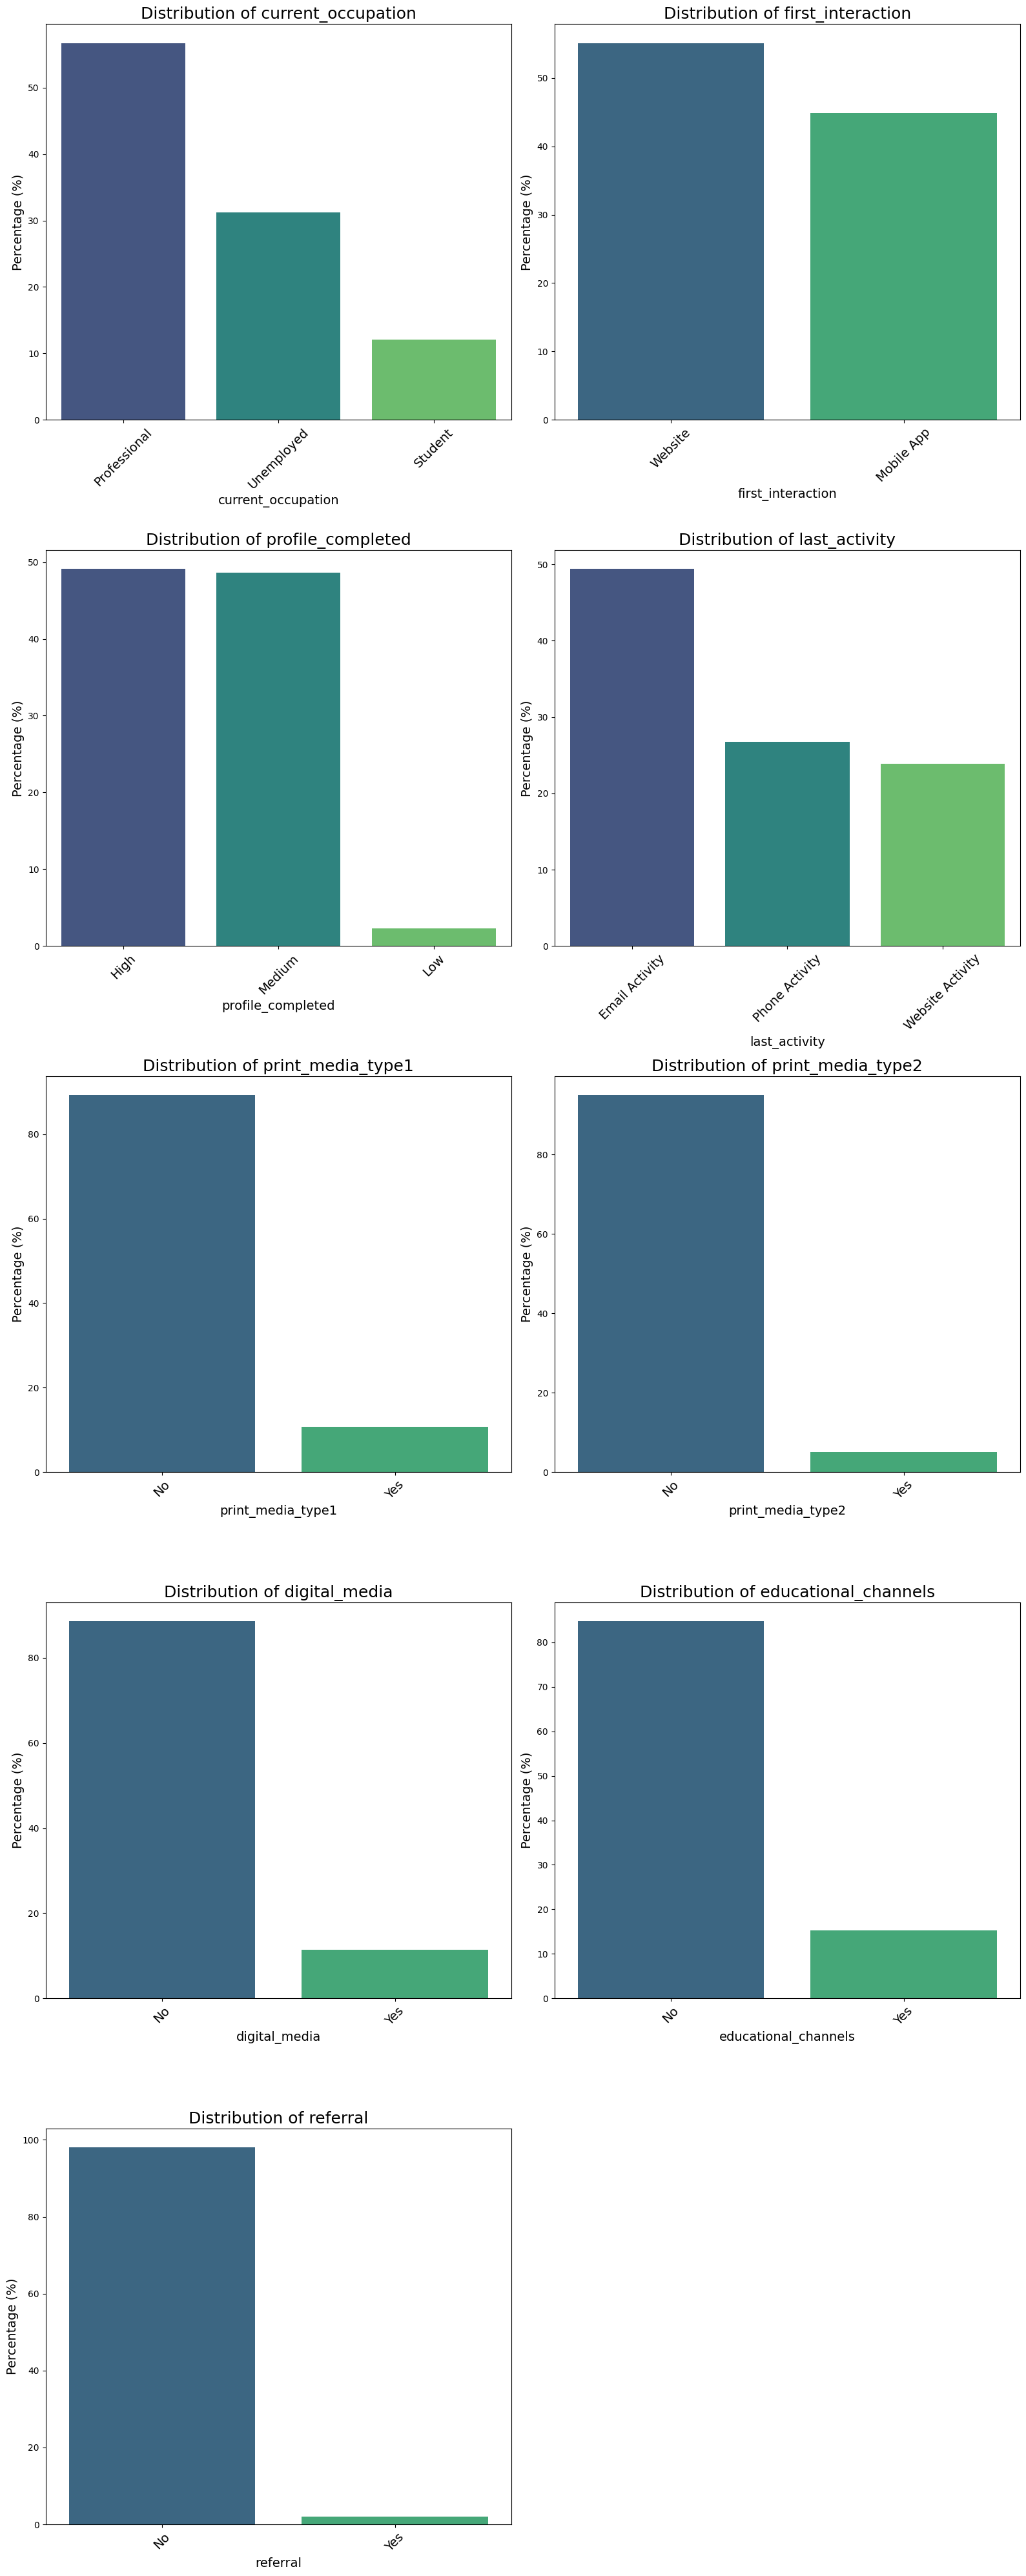

In [ ]:
# Percentage Distribution of Customer Attributes

# Create a grid with enough rows and 2 columns
fig, axes = plt.subplots(nrows=(len(cat_features) // 2 + 1), ncols=2, figsize=(16, 40)) 
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through categorical variables to plot
for i, col in enumerate(cat_features):
    percentages = df[col].value_counts(normalize=True) * 100  # Calculate percentages
    sns.barplot(x=percentages.index, y=percentages.values, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}", fontsize=18)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Percentage (%)" , fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=14 )

# Remove unused subplots
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



- Majority of the leads are professionals (more than 55%).

- The first interaction with the leads occurred through the website for more than 50% of them.

- Customer profiles are completed at medium and high levels, with only a small percentage of profiles remaining incomplete.

- The last interaction of the leads with ExtraaLearn was mostly via email, accounting for around 50%.

- The educational channel is the most frequently mentioned source for how the leads heard about ExtraaLearn.  

#### Bivariate and Multivariate analysis

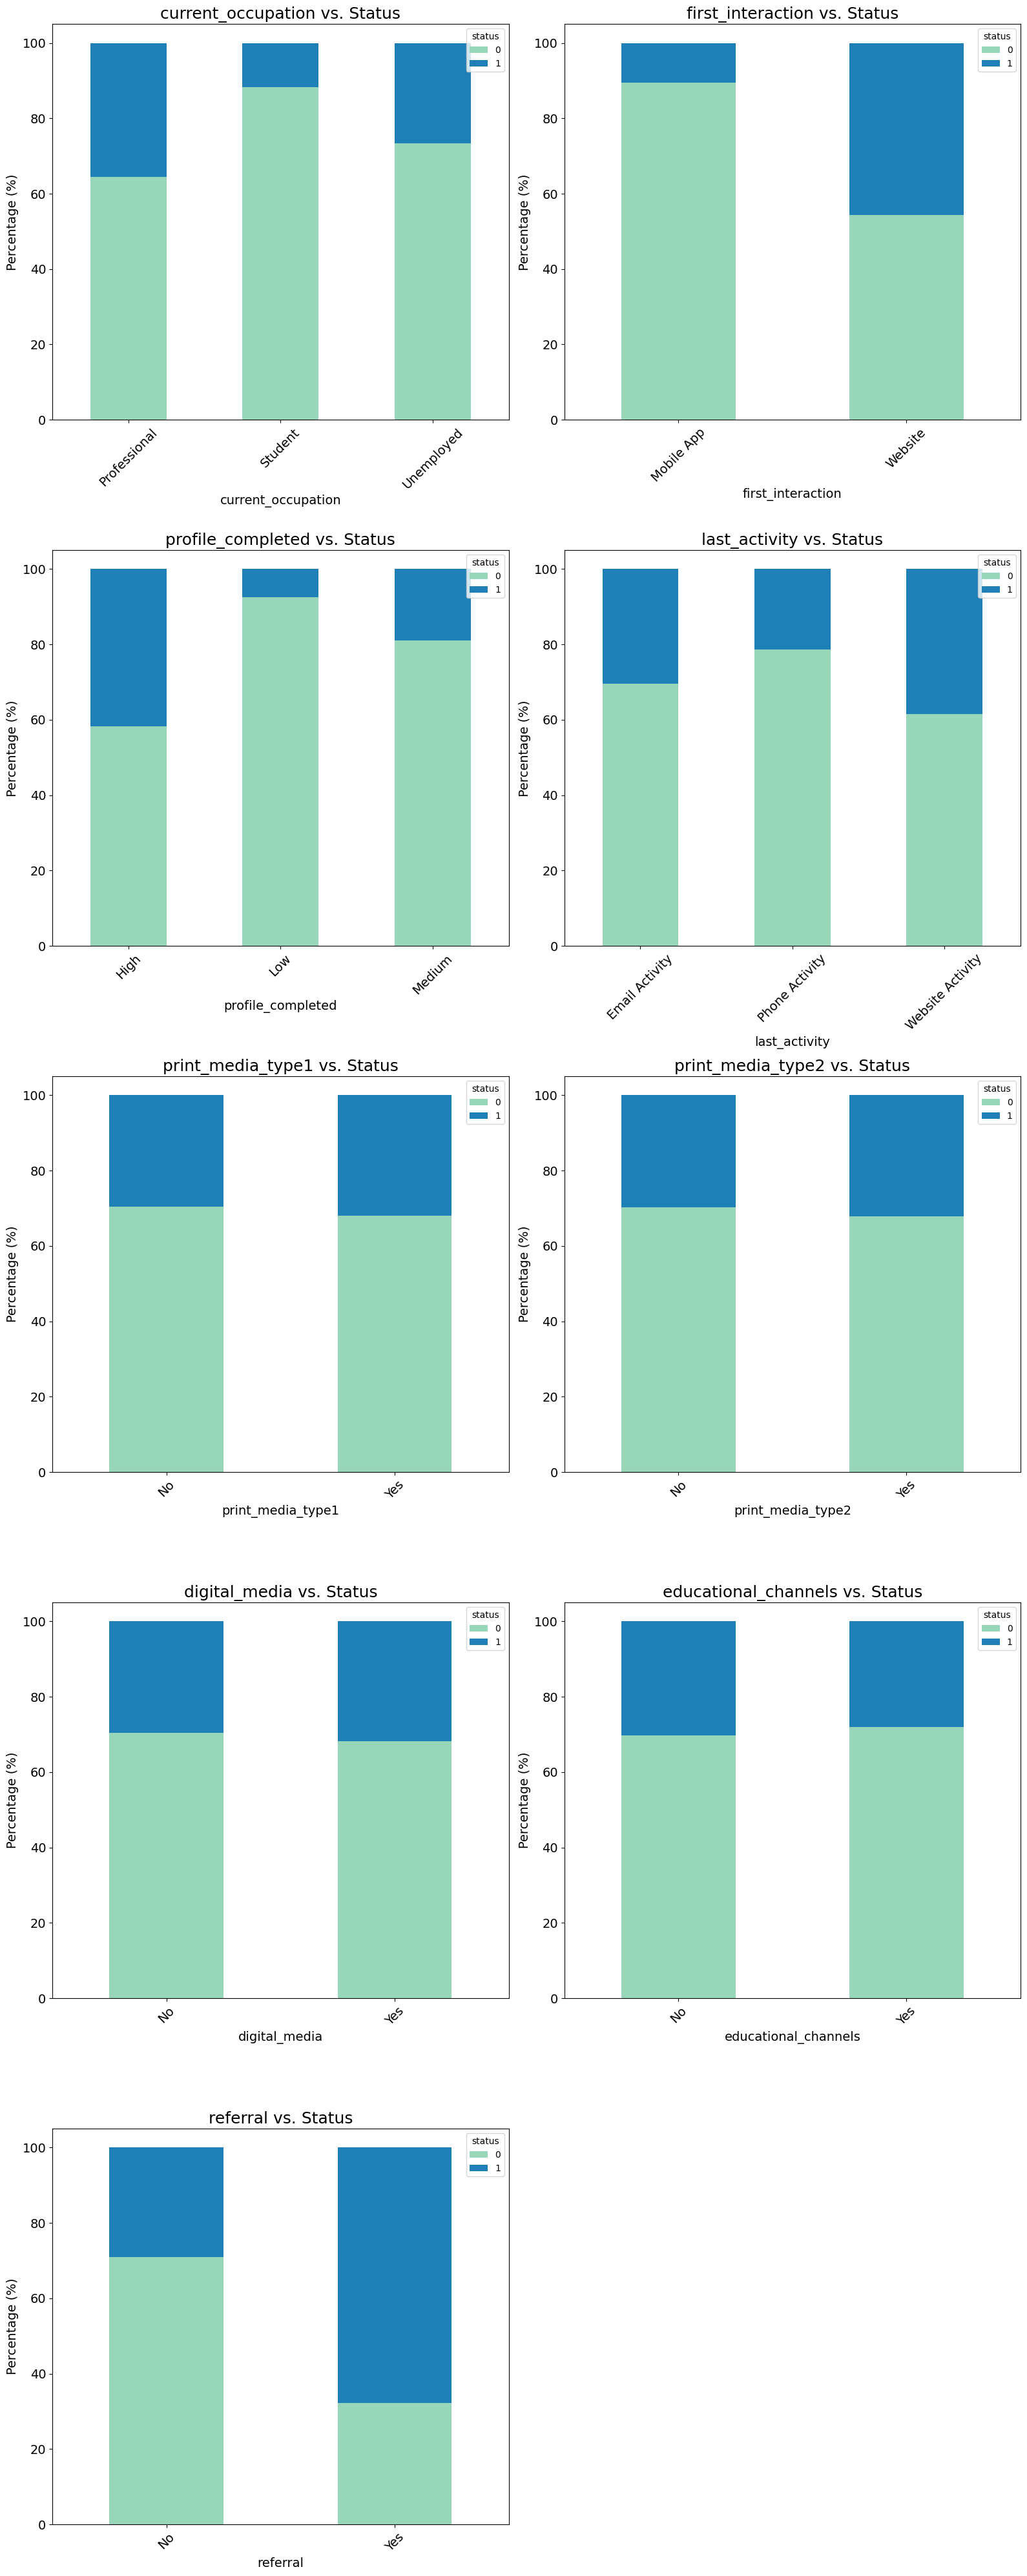

In [ ]:
# Percentage Distribution of Status by Customer Attributes

# Create a grid with enough rows and 2 columns for the crosstab analysis
fig, axes = plt.subplots(nrows=(len(cat_features) // 2 + 1), ncols=2, figsize=(16, 40))
axes = axes.flatten()  # Flatten axes for easy indexing

palette_name = "YlGnBu"  # Select a palette
colors = sns.color_palette(palette_name, n_colors=len(crosstab_data.columns))  # Generate colors

# Loop through the categorical variables
for i, col in enumerate(cat_features):
    # Compute the crosstab (percentage within each category)
    crosstab_data = pd.crosstab(df[col], df['status'], normalize='index') * 100
    
    # Plot the stacked bar chart
    crosstab_data.plot(kind='bar', stacked=True, ax=axes[i], color=colors)
    axes[i].set_title(f"{col} vs. Status", fontsize=18)
    axes[i].set_ylabel("Percentage (%)", fontsize=14)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)

# Remove unused subplots
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


Comments: 
- The group of professionals has the highest proportion of paid customers, followed by the unemployed and students.

- When the first interaction occurs through the website, the conversion rate to paid lead is higher than when it occurs through the mobile app.

- When the last contact occurs via the website, the lead conversion rate is higher compared to other channels, indicating that the website is more effective.

- The referral channel has the highest lead conversion rate.

- When the lead profile is highly completed, the lead conversion rate is higher compared to profiles with medium or low completion levels.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations